# First part: ridge regression

In [1]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import numpy as np
import math
import sklearn
import random
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn import decomposition
from scipy.stats.stats import pearsonr  
from numpy import linalg

## Ridge regression

Ridge regression is a type of regression that introduces the concept of regularization through the alpha parameter in the ERM; at the end of this project we will see how to calibrate the value of this parameter

A regressor is a function

<img src = "images/regressor.png" width = "200">

 where <em>w</em> is a vector of real coefficients (weights), and <em>x</em> refers to the <em>x</em> component of training set

As anticipated before, the ERM is regularized by parameter <b>$\alpha$</b>

<img src= "images/ridge_regression.png" width = "350"/>

where S is the <b>design matrix</b>, the matrix of examples without labels

$\nabla(\left \| Sw - y \right \|^2 + \alpha \left \| w \right \|^2) = 2(S^TSw - S^Ty) + 2\alpha w$

since we want to minimize this function, let's set it equal to 0 and we obtain

$(S^TS + \alpha I)w = S^Ty$

$w = (S^TS + \alpha I)^{-1} S^Ty$

The regularization is needed since, without it, the vector is unstable; in particular, it can change a lot when the dataset is perturbed and let's keep in mind that we had to deal with missing values, hence we changed a fex examples and this could have led to a variance error.

### Estimator

In [2]:
class myRidgeRegressor(object):
    def __init__(self):
        pass
    
    def fit(self, S, y, alfa):
        self.w = linalg.inv(S.T.dot(S) + alfa * np.eye(S.shape[1])).dot(S.T.dot(y))
    
    def predict(self, x):
        return x.dot(self.w)

In [3]:
def square_loss(prediction, y):
    return (y - prediction) ** 2

In [4]:
def MSE(prediction, y):
    loss = square_loss(prediction, y)
    return 1/len(loss) * sum(loss)

### Loading preprocessed datasets

Let's load the preprocessed datasets, we will handle 4 cases:
1. the complete dataset with replaced missing values normalized with min-max
2. the reduced dataset (missing values have been removed) with min-max normalization
3. the complete dataset with z-score normalization
4. the reduced dataset normalized with z-score

In [5]:
min_max_norm_dataset = pd.read_csv("datasets/min_max_norm_dataset")
min_max_norm_reduced_dataset = pd.read_csv("datasets/min_max_norm_reduced_dataset")

zscore_norm_dataset = pd.read_csv("datasets/zscore_norm_dataset")
zscore_norm_reduced_dataset = pd.read_csv("datasets/zscore_norm_reduced_dataset")

In [6]:
del min_max_norm_dataset["Unnamed: 0"]
del min_max_norm_reduced_dataset["Unnamed: 0"]
del zscore_norm_dataset["Unnamed: 0"]
del zscore_norm_reduced_dataset["Unnamed: 0"]

### Splitting in training and test set

In [7]:
def split_dataset(dataset):
    y = dataset["median_house_value"]
    x = dataset.drop("median_house_value", axis = 1)
    return train_test_split(x, y, test_size = 0.2)

Now we apply the ridge regressor for the 4 datasets and compute predictions, for this part it will be used $\alpha$ = 0.1

In [8]:
ridge_regressor = myRidgeRegressor()

### First dataset

In [9]:
x_train, x_test, y_train, y_test = split_dataset(min_max_norm_dataset)

We fit the regressor with the training set, we obtain a w vector of weights that depends on alpha parameter

In [10]:
ridge_regressor.fit(x_train, y_train, 0.1)
ridge_regressor.w

array([-0.16376016, -0.0976141 ,  0.14893368, -0.37185783,  0.53708115,
       -0.79206565,  0.15768522,  0.76004529,  0.21670352])

and we can test the regressor on the test set to see how good predictions are done

In [11]:
predictions = ridge_regressor.predict(x_test)
predictions[:10]

13977    0.591537
14731    0.667780
8693     0.552177
9831     0.100311
9840     0.180916
15139    0.755683
12680    0.472535
1667     0.117668
6755     0.482111
5606     0.389671
dtype: float64

In [12]:
loss = square_loss(predictions, y_test)

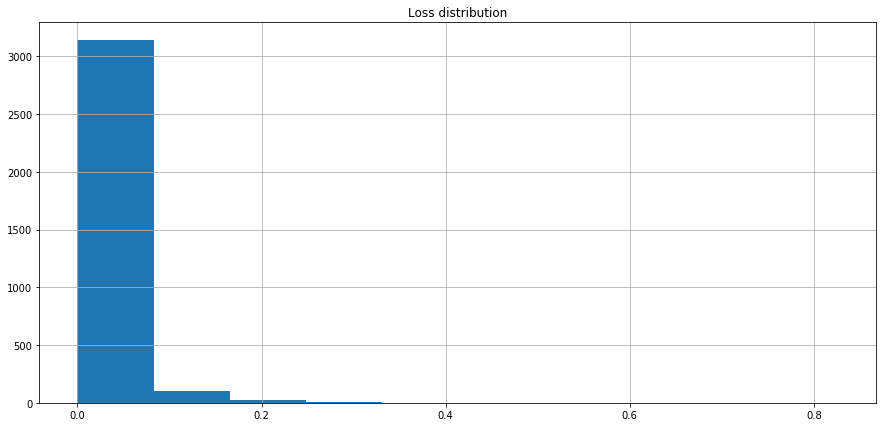

In [13]:
plt.figure(figsize=(15, 7))
plt.title('Loss distribution')
plt.hist(loss.values)
plt.grid()
plt.show()

In [14]:
test_error = MSE(predictions, y_test)
test_error

0.019216074418744008

In [15]:
r2_score(y_test, predictions)

0.5751085141205589

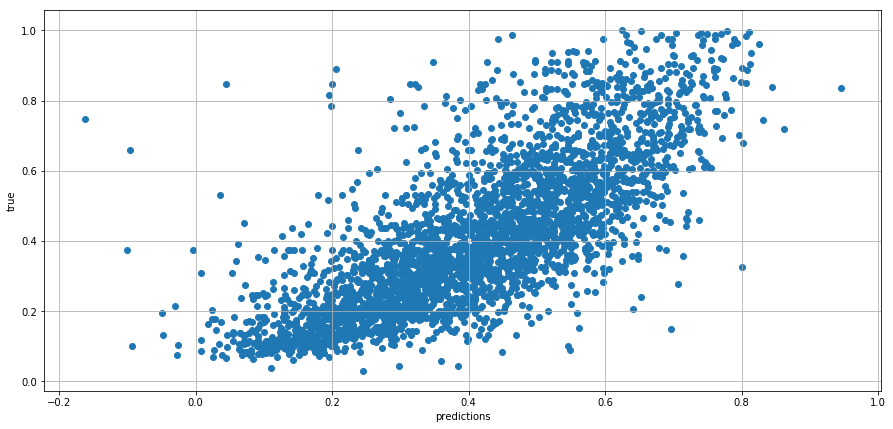

In [16]:
plt.figure(figsize=(15, 7))
plt.scatter(predictions, y_test)
plt.xlabel("predictions")
plt.ylabel("true")
plt.grid()
plt.show()

### Second dataset

In [17]:
x_train, x_test, y_train, y_test = split_dataset(min_max_norm_reduced_dataset)

In [18]:
ridge_regressor.fit(x_train, y_train, 0.1)
ridge_regressor.w

array([-0.16329438, -0.09499311,  0.14904792, -0.36250512,  0.5401589 ,
       -0.79844239,  0.14644954,  0.76085199,  0.2164132 ])

In [19]:
predictions = ridge_regressor.predict(x_test)
predictions[:10]

8630     0.458178
3229     0.367921
6919     0.846898
342      0.444312
12714    0.518055
10955    0.486652
9847     0.247237
13575    0.716001
3924     0.574545
16095    0.689162
dtype: float64

In [20]:
loss = square_loss(predictions, y_test)

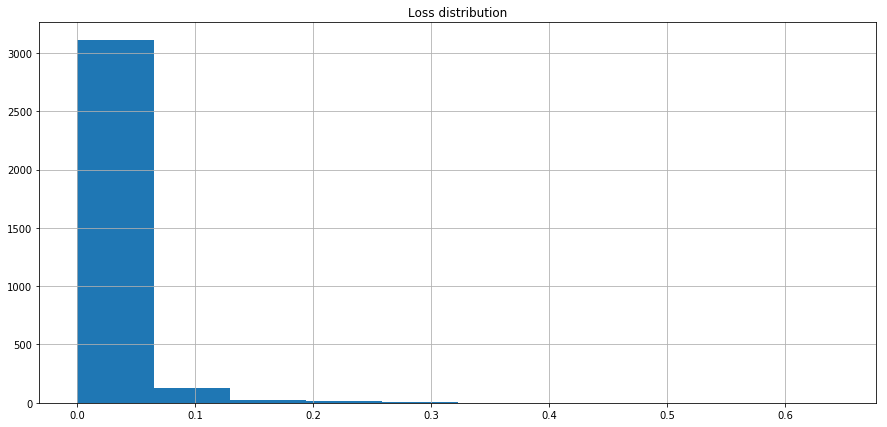

In [21]:
plt.figure(figsize=(15, 7))
plt.title('Loss distribution')
plt.hist(loss.values)
plt.grid()
plt.show()

In [22]:
test_error = MSE(predictions, y_test)
test_error

0.01750584642105283

In [23]:
r2_score(y_test, predictions)

0.5906248304483526

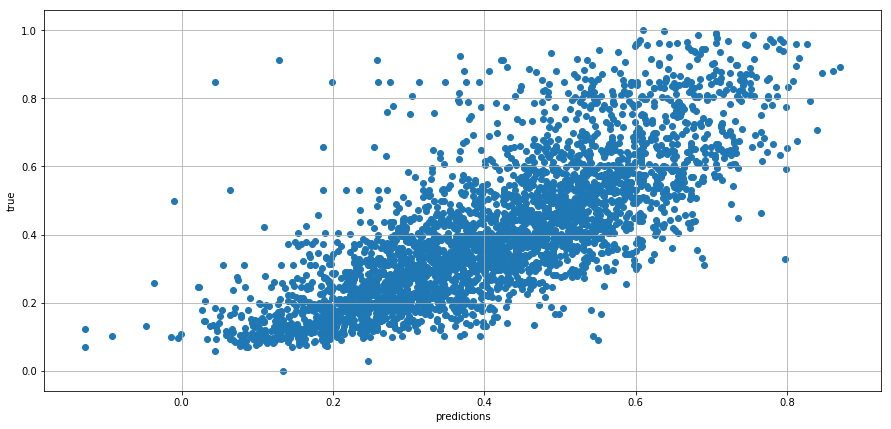

In [24]:
plt.figure(figsize=(15, 7))
plt.scatter(predictions, y_test)
plt.xlabel("predictions")
plt.ylabel("true")
plt.grid()
plt.show()

### Third dataset

In [25]:
x_train, x_test, y_train, y_test = split_dataset(zscore_norm_dataset)

In [26]:
ridge_regressor.fit(x_train, y_train, 0.1)
ridge_regressor.w

array([-0.62494432, -0.62759892,  0.11388866, -0.24801141,  0.49298287,
       -0.28984353,  0.05806118,  0.63281041,  0.15408365])

In [27]:
predictions = ridge_regressor.predict(x_test)
predictions[:10]

4133    -0.939615
8367    -0.614480
795      1.056275
5090    -0.029367
13368    0.331642
12745    0.702059
169     -0.052200
10750   -0.620172
1394     0.882283
6560     0.604429
dtype: float64

In [28]:
loss = square_loss(predictions, y_test)

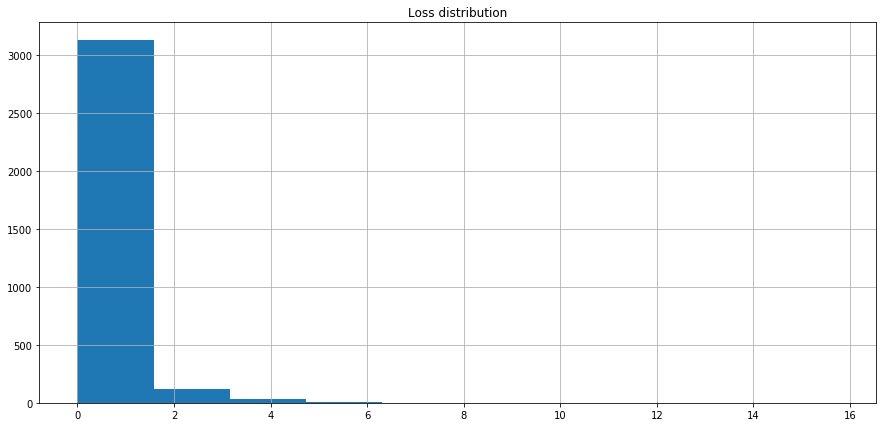

In [29]:
plt.figure(figsize=(15, 7))
plt.title('Loss distribution')
plt.hist(loss.values)
plt.grid()
plt.show()

In [30]:
test_error = MSE(predictions, y_test)
test_error

0.39263883749073725

In [31]:
r2_score(y_test, predictions)

0.608219813450845

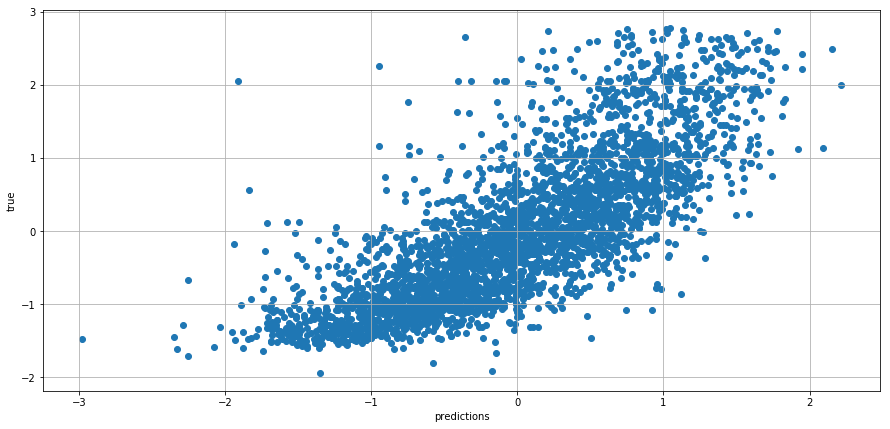

In [32]:
plt.figure(figsize=(15, 7))
plt.scatter(predictions, y_test)
plt.xlabel("predictions")
plt.ylabel("true")
plt.grid()
plt.show()

### Fourth dataset

In [33]:
x_train, x_test, y_train, y_test = split_dataset(zscore_norm_reduced_dataset)

In [34]:
ridge_regressor.fit(x_train, y_train, 0.1)
ridge_regressor.w

array([-0.59260454, -0.59980934,  0.11305574, -0.25996989,  0.49210927,
       -0.27916621,  0.05919792,  0.64464114,  0.15902571])

In [35]:
predictions = ridge_regressor.predict(x_test)
predictions[:10]

8806     0.508349
1653    -1.044130
11492    0.462987
16136    0.196715
2591    -0.325443
5803     0.738879
2696    -0.602652
2059    -1.771579
5072     0.316513
766      1.002144
dtype: float64

In [36]:
loss = square_loss(predictions, y_test)

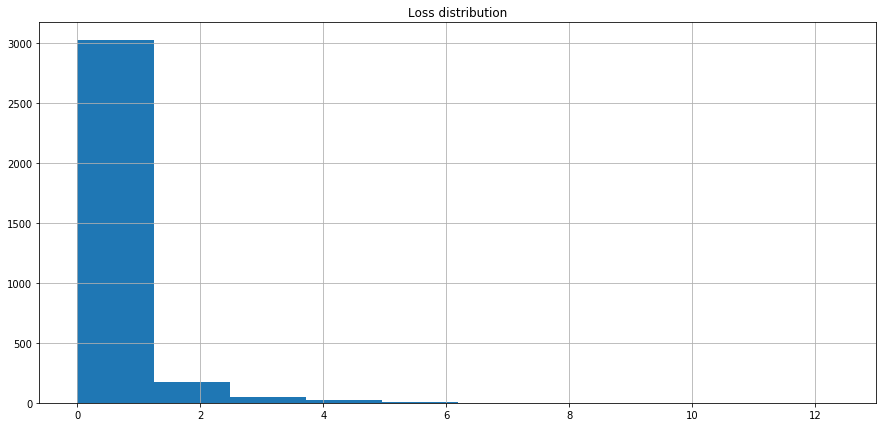

In [37]:
plt.figure(figsize=(15, 7))
plt.title('Loss distribution')
plt.hist(loss.values)
plt.grid()
plt.show()

In [38]:
test_error = MSE(predictions, y_test)
test_error

0.4002180313143551

In [39]:
r2_score(y_test, predictions)

0.5969884259313775

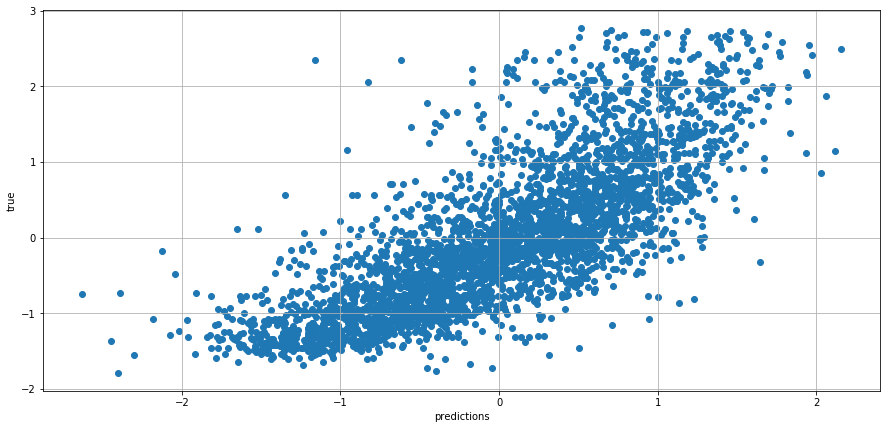

In [40]:
plt.figure(figsize=(15, 7))
plt.scatter(predictions, y_test)
plt.xlabel("predictions")
plt.ylabel("true")
plt.grid()
plt.show()

We notice a relevant difference in test error between the first two datasets with respect to the last twos, which reveals that min max normalization produces better result than z-score.
For what it concerns the replacement of missing values, we notice very little difference.

# Second part: analysis

We are dealing with a learning problem $(D, l)$ where $l$ is the square loss:

- Let $h(S)$ be the prediction of predictor $h$ on training set $S$
- Let $l_D(h(S))$ be the risk of $h(S)$
- Let $E[l_D(h)]$ be the expected risk of $h(S)$ where the expectation is with respect to the random draw of training set $S$

Hence, $E[l_D(h)]$ measures the performance of $h$ on a random training set whereas $l_D(h(S))$ measures the performance of $h$ when the training set is $S$

## K-fold cross validation

We would like to estimate $E[l_D(h)]$ to see, in general, the goodness of our predictor; in order to do this, we can use k-fold cross validation:  
let $S$ be the entire dataset, we partition $S$ in $K$ subsets (called folds) $D_1, D_2, ..., D_K$ of size $m/K$ each where $m$ is the size of $S$ and we use $S^{(k)}$ as <b>training part</b> with $S^{(k)} \equiv S \setminus D_k$ where $D_k$ is the <b>testing part</b>;
we iterate this process for $k = 1 ... K$.

In [211]:
m = len(min_max_norm_reduced_dataset)
K = 5

print(m, K)

20640 5


we choose $K$ such that $m$ is divisible with $K$

In [212]:
def k_fold_split(dataset, m, K):
    partitions = {}
    shift = int(m/K)
    pivot = 0
    for i in range(1, K+1):
        partitions[i] = dataset.iloc[pivot : pivot + shift]
        pivot = pivot + shift
    return partitions

In [213]:
partitions = k_fold_split(min_max_norm_reduced_dataset, m, K)

Now that we have $K$ folds we can proceed by iterating over them choosing the training and the testing part

In order to handle all the possible combinations of training and test set splitting, we convert the vector into a set, such that we can consider all combinations easily

In [214]:
def cross_correlation(partitions, alfa):   
    K = len(partitions)
    vec = []

    for i in range(1, K+1):
        vec.append(i)

    vec_set = set(vec)

    scores = []
    alfa = alfa

    for i in vec:
        # S^(i) means using fold i as testing part and the rest as training

        testing_part = partitions[i]
        vec_set.remove(i)
        training_part = pd.DataFrame()

        for j in vec_set:
            training_part = training_part.append(partitions[j])

        # in this point we compute scores
        y_train = training_part["median_house_value"]
        x_train = training_part.drop("median_house_value", axis = 1)

        y_test = testing_part["median_house_value"]
        x_test = testing_part.drop("median_house_value", axis = 1)

        # learning with training part
        ridge_regressor.fit(x_train, y_train, alfa)

        # testing with testing part
        result = ridge_regressor.predict(x_test)
        scores.append(MSE(result, y_test))

        vec_set.add(i)
    return scores

In [215]:
scores = cross_correlation(partitions, 0.1)
scores

[0.016340763580729875,
 0.024800620100203837,
 0.024813923588626472,
 0.027072579519510778,
 0.019559934189313052]

In [216]:
cv_estimate = np.mean(scores)
cv_estimate

0.022517564195676805

Now let's compare the cv estimate for all 4 datasets we had before

In [217]:
partitions = k_fold_split(min_max_norm_dataset, m, K)
cv_1 = np.mean(cross_correlation(partitions, 0.1))

partitions = k_fold_split(min_max_norm_reduced_dataset, m, K)
cv_2 = np.mean(cross_correlation(partitions, 0.1))

partitions = k_fold_split(zscore_norm_dataset, m, K)
cv_3 = np.mean(cross_correlation(partitions, 0.1))

partitions = k_fold_split(zscore_norm_reduced_dataset, m, K)
cv_4 = np.mean(cross_correlation(partitions, 0.1))

print(cv_1, cv_2, cv_3, cv_4)

0.022517564195676805 0.022517564195676805 0.38079181660894346 0.38079181660894346


## Dependence of the cross-validated risk estimate on the parameter alpha

For simplicity, let's consider only one dataset, we will choose the one that showed the best performance with $ \alpha = 0.1$

We will test 5000 values for $\alpha$, from 0 to 499 with a step of 0.1

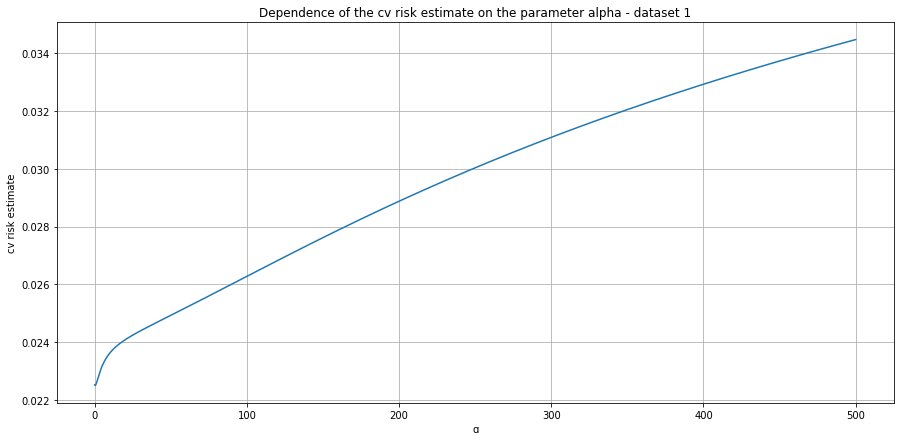

In [218]:
cv_scores = []
partitions = k_fold_split(min_max_norm_dataset, m, K)
alfas = np.linspace(0, 500, 5000)

for i in alfas:
    cv_scores.append(np.mean(cross_correlation(partitions, i)))
    
plt.figure(figsize=(15, 7))
plt.title('Dependence of the cv risk estimate on the parameter alpha - dataset 1')
plt.plot(alfas, cv_scores)
plt.xlabel("ɑ")
plt.ylabel("cv risk estimate")
plt.grid()
plt.show()

From this plot we can conclude that the cv risk estimate increseas monotonically for $\alpha \rightarrow \infty$

Let's study the behavior of the risk estimate with the other 3 datasets

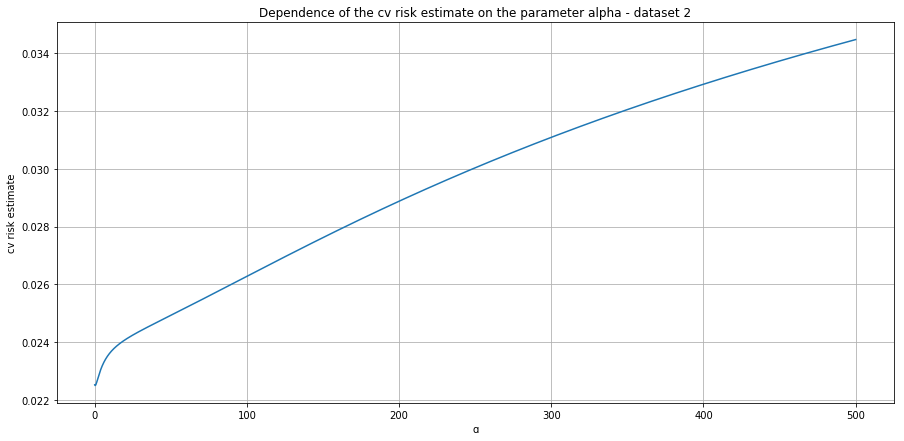

In [219]:
cv_scores = []
partitions = k_fold_split(min_max_norm_reduced_dataset, m, K)
alfas = np.linspace(0, 500, 5000)

for i in alfas:
    cv_scores.append(np.mean(cross_correlation(partitions, i)))
    
plt.figure(figsize=(15, 7))
plt.title('Dependence of the cv risk estimate on the parameter alpha - dataset 2')
plt.plot(alfas, cv_scores)
plt.xlabel("ɑ")
plt.ylabel("cv risk estimate")
plt.grid()
plt.show()

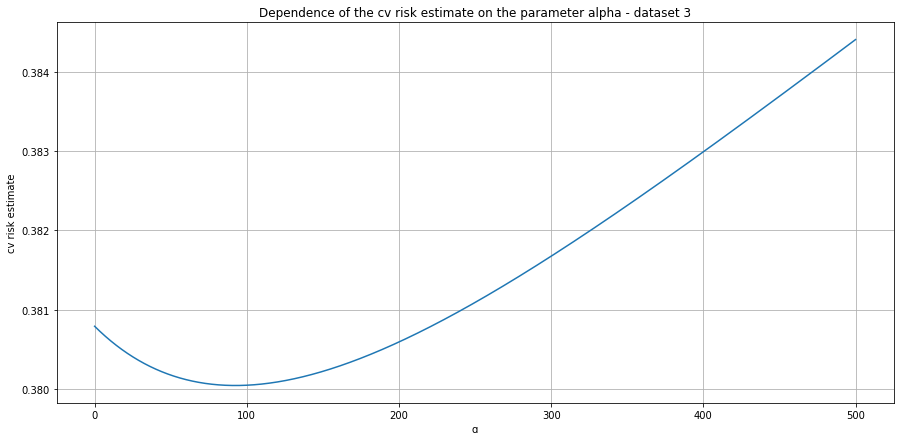

In [220]:
cv_scores = []
partitions = k_fold_split(zscore_norm_dataset, m, K)
alfas = np.linspace(0, 500, 5000)

for i in alfas:
    cv_scores.append(np.mean(cross_correlation(partitions, i)))
    
plt.figure(figsize=(15, 7))
plt.title('Dependence of the cv risk estimate on the parameter alpha - dataset 3')
plt.plot(alfas, cv_scores)
plt.xlabel("ɑ")
plt.ylabel("cv risk estimate")
plt.grid()
plt.show()

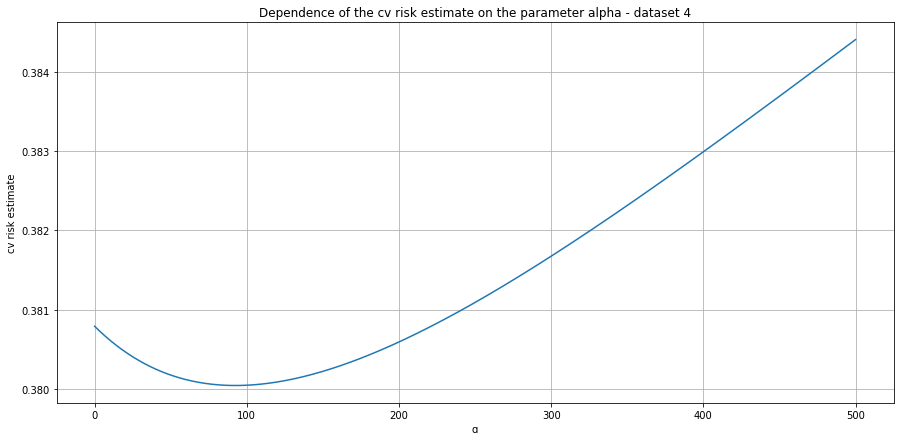

In [221]:
cv_scores = []
partitions = k_fold_split(zscore_norm_reduced_dataset, m, K)
alfas = np.linspace(0, 500, 5000)

for i in alfas:
    cv_scores.append(np.mean(cross_correlation(partitions, i)))
  
plt.figure(figsize=(15, 7))
plt.title('Dependence of the cv risk estimate on the parameter alpha - dataset 4')
plt.plot(alfas, cv_scores)
plt.xlabel("ɑ")
plt.ylabel("cv risk estimate")
plt.grid()
plt.show()

We see that for the last two datasets (z-score) there is a slight improvement by increasing alpha, so after normalizing with z-score, it's not true anymore that values towards 0 mean more accurate regressor, anyway, also in this case we have that the cv risk estimate increases as $\alpha \rightarrow \infty$ 

This means that there is a dependence of positive linear relationship between cv risk estimate and parameter alpha, in order to confirm this let's compute the correlation coefficient:

In [222]:
pearsonr(alfas, cv_scores)[0]

0.9434448863972952

This is highly confirmed by the Pearson coefficient.

## Using PCA

In [223]:
def prediction_with_PCA(alfa, x_train, y_train, x_test, y_test):
    pca = decomposition.PCA(n_components=7)
    pca.fit(x_train)
    x_train_pca = pca.transform(x_train)
    x_test_pca = pca.transform(x_test)
    ridge_regressor.fit(x_train_pca, y_train, alfa = 0.1)
    predictions = ridge_regressor.predict(x_test_pca)
    test_error = MSE(predictions, y_test)
    return test_error

Now we can update our previous function of cross correlation by adding the PCA procedure

In [224]:
def cross_correlation_with_PCA(partitions, alfa):   
    K = len(partitions)
    vec = []

    for i in range(1, K+1):
        vec.append(i)

    vec_set = set(vec)

    scores = []
    alfa = alfa

    for i in vec:
        # S^(i) means using fold i as testing part and the rest as training

        testing_part = partitions[i]
        vec_set.remove(i)
        training_part = pd.DataFrame()

        for j in vec_set:
            training_part = training_part.append(partitions[j])

        # in this point we compute scores
        y_train = training_part["median_house_value"]
        x_train = training_part.drop("median_house_value", axis = 1)

        y_test = testing_part["median_house_value"]
        x_test = testing_part.drop("median_house_value", axis = 1)

        # UPDATE
        pca_score = prediction_with_PCA(alfa, x_train, y_train, x_test, y_test)
        
        scores.append(pca_score)

        vec_set.add(i)
    return scores

In [225]:
partitions = k_fold_split(min_max_norm_dataset, m, K)
cv_1 = np.mean(cross_correlation_with_PCA(partitions, 0.1))

partitions = k_fold_split(min_max_norm_reduced_dataset, m, K)
cv_2 = np.mean(cross_correlation_with_PCA(partitions, 0.1))

partitions = k_fold_split(zscore_norm_dataset, m, K)
cv_3 = np.mean(cross_correlation_with_PCA(partitions, 0.1))

partitions = k_fold_split(zscore_norm_reduced_dataset, m, K)
cv_4 = np.mean(cross_correlation_with_PCA(partitions, 0.1))

print(cv_1, cv_2, cv_3, cv_4)

0.17922172568213993 0.17922172568213993 0.3849041792172275 0.3849041792172275


In [226]:
cross_correlation(partitions, 0.1)

[0.289846966617546,
 0.4192351146294848,
 0.4266019475080923,
 0.4423442872729484,
 0.3259307670166458]

In [227]:
cross_correlation_with_PCA(partitions, 0.1)

[0.2644422879224533,
 0.4257608270088835,
 0.4213476029641773,
 0.4734732439056509,
 0.33949693428497235]

## optional: try nested CV to avoid choosing alpha